# Data reading and pre-cleaning

In [1]:
import pandas as pd

In [2]:
original_data = pd.read_excel('../data/original/original_data.xlsx', sheet_name='Sheet1')

print (original_data.head())

         ID PtGender PtAge                                      Diagnosis  \
0  23765692        男   68岁         消化道穿孔腹膜炎冠状动脉粥样硬化性心脏病高血压脑梗死冠状动脉粥样硬化性心脏病   
1  23765694        男   89岁                                 乏力低钾血症贫血低钾血症贫血   
2  23765695        男   77岁  药物中毒高血压陈旧性心肌梗死冠状动脉粥样硬化性心脏病恶性肿瘤个人史陈旧性心肌梗死前列腺增生   
3  23765696        女   91岁     昏迷糖尿病伴有酮症酸中毒型糖尿病急性脑血管病阿尔茨海默病型糖尿病肾功能不全肝功能不全   
4  23765697        女   34岁                                             发热   

   FYZ-IgM   甲流   乙流  分组汇总    WBC   RBC  ...  MONO%  EO%  BASO%   IG#  IG%  \
0      NaN  NaN  NaN   NaN   9.70  4.92  ...    3.4  0.0    0.0  0.01  0.1   
1      NaN  2.0  NaN   2.0   8.69  3.11  ...    3.9  6.0    0.2  0.07  0.8   
2      NaN  NaN  NaN   NaN  11.04  4.33  ...    5.4  4.5    0.3  0.01  0.1   
3      NaN  NaN  NaN   NaN  10.44  2.77  ...    0.5  0.3    0.0  0.09  0.9   
4      NaN  NaN  3.0   3.0   3.00  4.29  ...   11.8  1.0    0.3  0.00  0.0   

     CRP  HFLC1  HFLC2  NRBC#  NRBC%  
0  94.34   0.03    0.3    0.0

### Pre-cleaning

In [35]:
original_data['PtAge'] = original_data['PtAge'].astype(str)

# 处理 '岁'
original_data.loc[original_data['PtAge'].str.contains('岁', na=False), 'PtAge'] = original_data.loc[original_data['PtAge'].str.contains('岁', na=False), 'PtAge'].str.replace('岁', '').astype(float)

# 处理 '天'
original_data.loc[original_data['PtAge'].str.contains('天', na=False), 'PtAge'] = original_data.loc[original_data['PtAge'].str.contains('天', na=False), 'PtAge'].str.replace('天', '').astype(float) / 365

# 处理 '月'
original_data.loc[original_data['PtAge'].str.contains('月', na=False), 'PtAge'] = original_data.loc[original_data['PtAge'].str.contains('月', na=False), 'PtAge'].str.replace('月', '').astype(float) / 12

# 将转换后的年龄转换为浮点数
original_data['PtAge'] = original_data['PtAge'].astype(float)

# change 男女 to 0, 1
original_data['PtGender'] = original_data['PtGender'].replace({'男': 0, '女': 1})
original_data.drop_duplicates(inplace=True)

# for data in diagnosis, keep the rows with '发烧‘ only, 
# for data in 分组汇总, only keep those with empty and make a new dataframe
not_infected_data = original_data[original_data['Diagnosis'] == '发热']
not_infected_data = not_infected_data[not_infected_data['分组汇总'].isnull()]

# positive data is those not in the not_infected_data
positive_data = original_data[original_data['分组汇总'].notnull()]
# only keep those include '发热' in diagnosis
# positive_data = positive_data[positive_data['Diagnosis'].str.contains('发热', na=False)]
positive_data



,ID,PtGender,PtAge,Diagnosis,FYZ-IgM,甲流,乙流,分组汇总,WBC,RBC,...,MONO%,EO%,BASO%,IG#,IG%,CRP,HFLC1,HFLC2,NRBC#,NRBC%
1,23765694,0.0,89.0,乏力低钾血症贫血低钾血症贫血,NaN,2.0,NaN,2.0,8.69,3.11,...,3.9,6.0,0.2,0.07,0.8,NaN,0.01,0.2,0.0,0.0
4,23765697,1.0,34.0,发热,NaN,NaN,3.0,3.0,3.00,4.29,...,11.8,1.0,0.3,0.00,0.0,0.95,0.00,0.1,0.0,0.0
45,23769968,1.0,23.0,呼吸困难,1.0,NaN,NaN,1.0,21.35,4.30,...,5.1,0.6,0.1,0.02,0.1,41.00,0.01,0.0,0.0,0.0
67,23773946,1.0,17.0,咳嗽,1.0,NaN,NaN,1.0,11.48,3.99,...,4.9,0.3,0.3,0.00,0.0,35.00,0.00,0.0,0.0,0.0
86,23774757,1.0,12.0,急性扁桃体炎,1.0,NaN,NaN,1.0,6.28,4.77,...,10.1,0.1,0.0,0.00,0.0,21.91,0.02,0.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20919,24026660,0.0,29.0,发热,NaN,2.0,NaN,2.0,4.82,5.47,...,12.2,0.2,0.2,0.00,0.0,11.63,0.00,0.0,NaN,NaN
20924,24027023,0.0,20.0,发热,1.0,NaN,NaN,1.0,8.70,5.01,...,12.1,5.5,0.7,0.02,0.2,30.17,0.03,0.3,NaN,NaN
20926,24027047,1.0,18.0,发热,NaN,2.0,NaN,2.0,5.13,4.33,...,16.4,0.0,0.4,0.00,0.0,3.60,0.00,0.0,NaN,NaN
20927,24027055,1.0,21.0,发热,NaN,2.0,NaN,2.0,4.17,4.83,...,20.1,0.0,0.5,0.01,0.2,5.82,0.01,0.2,NaN,NaN


In [4]:
original_data.describe()

,ID,PtGender,PtAge,FYZ-IgM,甲流,乙流,分组汇总,WBC,RBC,HGB,...,MONO%,EO%,BASO%,IG#,IG%,CRP,HFLC1,HFLC2,NRBC#,NRBC%
count,2.093100e+04,20915.000000,20901.000000,2255.0,2698.0,180.0,4794.000000,20931.000000,20931.000000,20931.000000,...,20920.000000,20930.000000,20931.000000,20929.000000,20929.000000,18638.000000,20917.000000,20917.000000,17588.000000,17588.000000
mean,2.391222e+07,0.527660,32.335900,1.0,2.0,3.0,2.345015,8.528668,4.487609,132.726960,...,8.157357,1.301056,0.215680,0.034958,0.336156,16.923381,0.026673,0.347712,0.002542,0.025228
std,7.091205e+04,0.499246,23.559567,0.0,0.0,0.0,2.733956,5.412591,0.707574,21.775053,...,3.604326,1.824411,0.208438,0.160750,0.923051,28.547930,0.070412,0.716571,0.043192,0.415907
min,2.376551e+07,0.000000,0.000000,1.0,2.0,3.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.385850e+07,0.000000,14.000000,1.0,2.0,3.0,1.000000,5.930000,4.210000,124.000000,...,5.600000,0.200000,0.100000,0.010000,0.100000,2.390000,0.010000,0.100000,0.000000,0.000000
50%,2.392192e+07,1.000000,26.000000,1.0,2.0,3.0,2.000000,7.700000,4.570000,135.000000,...,7.500000,0.700000,0.200000,0.010000,0.200000,7.785000,0.010000,0.200000,0.000000,0.000000
75%,2.397281e+07,1.000000,46.000000,1.0,2.0,3.0,2.000000,10.075000,4.920000,146.000000,...,10.100000,1.700000,0.300000,0.030000,0.300000,19.030000,0.030000,0.400000,0.000000,0.000000
max,2.402725e+07,1.000000,99.000000,1.0,2.0,3.0,13.000000,466.400000,7.350000,242.000000,...,53.700000,49.400000,6.000000,9.880000,28.600000,362.370000,6.350000,42.400000,3.092000,33.230000


In [5]:
# print summary of data
print(original_data.info())
print(original_data.describe())
print(not_infected_data.info())
print(not_infected_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20931 entries, 0 to 20930
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         20931 non-null  int64  
 1   PtGender   20915 non-null  float64
 2   PtAge      20901 non-null  float64
 3   Diagnosis  20768 non-null  object 
 4   FYZ-IgM    2255 non-null   float64
 5   甲流         2698 non-null   float64
 6   乙流         180 non-null    float64
 7   分组汇总       4794 non-null   float64
 8   WBC        20931 non-null  float64
 9   RBC        20931 non-null  float64
 10  HGB        20931 non-null  int64  
 11  HCT        20931 non-null  float64
 12  MCV        20931 non-null  float64
 13  MCH        20931 non-null  float64
 14  MCHC       20931 non-null  int64  
 15  PLT        20931 non-null  int64  
 16  RDW-SD     20931 non-null  float64
 17  RDW-CV     20931 non-null  float64
 18  PDW        20916 non-null  float64
 19  MPV        20916 non-null  float64
 20  P-LCR 

In [6]:
columns_to_drop = ['Diagnosis', 'FYZ-IgM', '甲流', '乙流', '分组汇总']
not_infected_data.drop(columns = columns_to_drop)


,ID,PtGender,PtAge,WBC,RBC,HGB,HCT,MCV,MCH,MCHC,...,MONO%,EO%,BASO%,IG#,IG%,CRP,HFLC1,HFLC2,NRBC#,NRBC%
70,23774029,0.0,79.0,6.84,4.34,145,42.3,97.5,33.4,343,...,7.3,1.6,0.0,0.01,0.1,25.78,0.00,0.1,0.0,0.0
99,23774788,1.0,61.0,3.31,4.37,135,40.0,91.5,30.9,338,...,8.4,0.0,0.2,0.00,0.1,14.10,0.09,2.7,0.0,0.0
115,23774873,1.0,21.0,8.01,4.42,122,37.5,84.8,27.6,325,...,9.4,0.1,0.1,0.01,0.1,17.12,0.01,0.1,0.0,0.0
116,23774874,1.0,25.0,4.02,4.89,141,42.6,87.1,28.8,331,...,12.6,0.4,0.1,0.00,0.1,1.18,0.03,0.7,0.0,0.0
121,23774888,1.0,35.0,16.30,3.97,122,36.5,91.9,30.9,334,...,4.3,2.3,0.2,0.03,0.2,31.46,0.04,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20921,24026827,0.0,23.0,5.52,5.05,150,45.5,90.1,29.7,330,...,13.9,0.2,0.2,0.01,0.2,4.42,0.01,0.2,NaN,NaN
20922,24026921,1.0,29.0,6.83,4.02,121,35.2,87.6,30.1,344,...,9.7,0.7,0.3,0.02,0.3,6.48,0.00,0.0,NaN,NaN
20923,24026931,0.0,29.0,5.59,5.12,149,44.8,87.5,29.1,333,...,14.3,6.8,0.2,0.04,0.7,12.50,0.01,0.2,NaN,NaN
20925,24027035,0.0,34.0,6.06,4.91,148,46.0,93.7,30.1,322,...,16.5,0.2,0.3,0.01,0.2,1.60,0.01,0.2,NaN,NaN


In [7]:
# combine positive and not_infected data
combined_data = pd.concat([positive_data, not_infected_data])

In [27]:
combined_data['PtAge'].describe()

count    7971.000000
mean       27.404832
std        16.624445
min         0.333333
25%        16.000000
50%        24.000000
75%        34.000000
max        99.000000
Name: PtAge, dtype: float64

In [8]:
combined_data.to_csv('../data/curated/combined_data.csv', index=False)

In [30]:
combined_data

,ID,PtGender,PtAge,Diagnosis,FYZ-IgM,甲流,乙流,分组汇总,WBC,RBC,...,MONO%,EO%,BASO%,IG#,IG%,CRP,HFLC1,HFLC2,NRBC#,NRBC%
1,23765694,0.0,89.0,乏力低钾血症贫血低钾血症贫血,NaN,2.0,NaN,2.0,8.69,3.11,...,3.9,6.0,0.2,0.07,0.8,NaN,0.01,0.2,0.0,0.0
4,23765697,1.0,34.0,发热,NaN,NaN,3.0,3.0,3.00,4.29,...,11.8,1.0,0.3,0.00,0.0,0.95,0.00,0.1,0.0,0.0
45,23769968,1.0,23.0,呼吸困难,1.0,NaN,NaN,1.0,21.35,4.30,...,5.1,0.6,0.1,0.02,0.1,41.00,0.01,0.0,0.0,0.0
67,23773946,1.0,17.0,咳嗽,1.0,NaN,NaN,1.0,11.48,3.99,...,4.9,0.3,0.3,0.00,0.0,35.00,0.00,0.0,0.0,0.0
86,23774757,1.0,12.0,急性扁桃体炎,1.0,NaN,NaN,1.0,6.28,4.77,...,10.1,0.1,0.0,0.00,0.0,21.91,0.02,0.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20921,24026827,0.0,23.0,发热,NaN,NaN,NaN,NaN,5.52,5.05,...,13.9,0.2,0.2,0.01,0.2,4.42,0.01,0.2,NaN,NaN
20922,24026921,1.0,29.0,发热,NaN,NaN,NaN,NaN,6.83,4.02,...,9.7,0.7,0.3,0.02,0.3,6.48,0.00,0.0,NaN,NaN
20923,24026931,0.0,29.0,发热,NaN,NaN,NaN,NaN,5.59,5.12,...,14.3,6.8,0.2,0.04,0.7,12.50,0.01,0.2,NaN,NaN
20925,24027035,0.0,34.0,发热,NaN,NaN,NaN,NaN,6.06,4.91,...,16.5,0.2,0.3,0.01,0.2,1.60,0.01,0.2,NaN,NaN


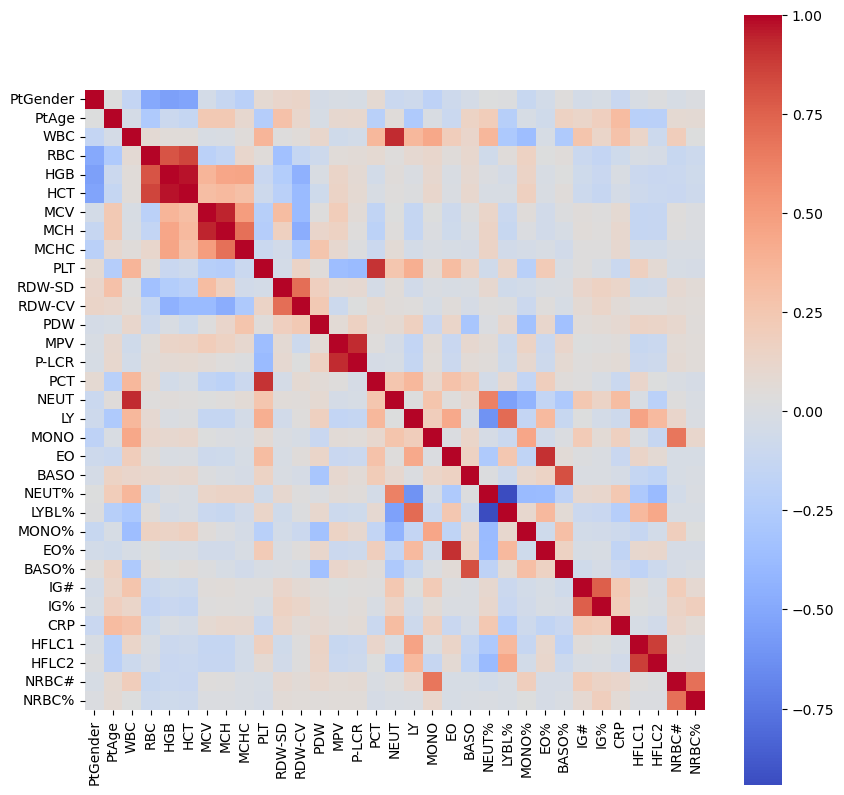

In [32]:
columns_to_drop = ['ID', 'Diagnosis', 'FYZ-IgM', '甲流', '乙流', '分组汇总']
data = combined_data.drop(columns = columns_to_drop)

corr_martix = data.corr()

# draw the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(corr_martix, square=True, cmap='coolwarm')
plt.show()